In [1511]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg
import scipy.integrate
from matplotlib import cm
from scipy import fft
from matplotlib.animation import FuncAnimation, PillowWriter 

In [1512]:
Omega = 2*np.pi
beta = 1
Gamma = 0.005

### Linear Diffusion and linear transport
The equations considered are 
$$u_t = D(t) u_{xx}$$
or 
$$u_t = - a u_x$$

In [918]:
N = 1;T=.94; Nt=300;Nx =100
a = 1; L = np.pi*2
dx = L/Nx
t = np.linspace(0,T, Nt)
t_span = (0, T)
y = np.zeros((len(nodes), Nt))
x = np.linspace(0,L-dx,Nx)
X, T = np.meshgrid(x,t)

def RHS_linear_diffusion_pseudo_spectral(t,y):
    N = len(y)
    n = np.arange(N);
    n[int(N/2)+1:] -= N
    dydt = -Gamma*np.cos(Omega*t)*fft.ifft(n**2*(2*np.pi/L)**2*fft.fft(y)).real
    return dydt
def RHS_linear_transport_pseudo_spectral(t,y):
    N = len(y)
    n = np.arange(N);
    n[int(N/2)+1:] -= N
    dydt = -a*fft.ifft(n*(2*np.pi/L)*1j*fft.fft(y)).real
    return dydt

In [919]:
u0 = np.exp(-beta*(x-L/2)**2)*np.sqrt(beta/np.pi)
u0 = - np.cos(x)*beta + 1
result_ivp = scipy.integrate.solve_ivp(RHS_linear_diffusion_pseudo_spectral, t_span,u0, 'BDF',atol = 1e-8,t_eval =t)
u = result_ivp.y
np.shape(u)

(100, 300)

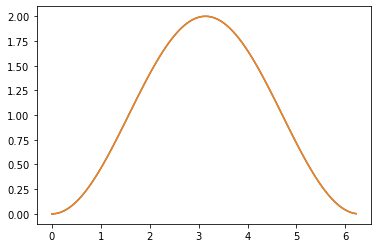

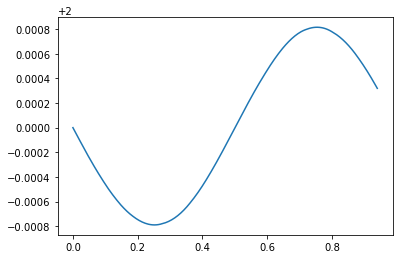

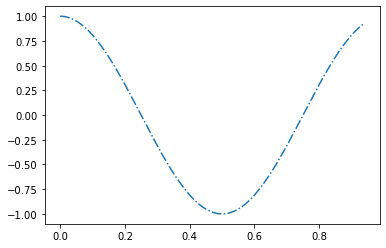

In [920]:
plt.plot(x,u[:,0])
plt.plot(x,u[:,-1])
plt.show()
plt.plot(t, np.max(u, axis=0))
#plt.plot(t, np.sqrt(beta/np.pi)*1/np.sqrt(4*Gamma*beta/Omega*np.sin(Omega*t)+1))
plt.show()
plt.plot(t, np.cos(Omega*t), '-.')

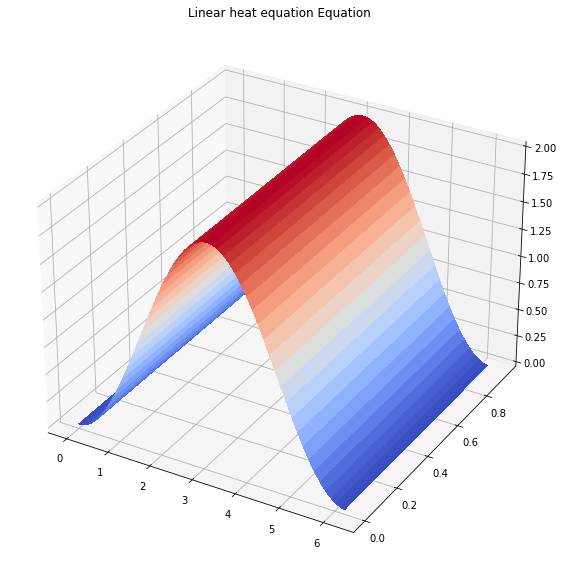

In [921]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10,10))
surf = ax.plot_surface(X,T,u.T,cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_title('Linear heat equation Equation')
plt.show()

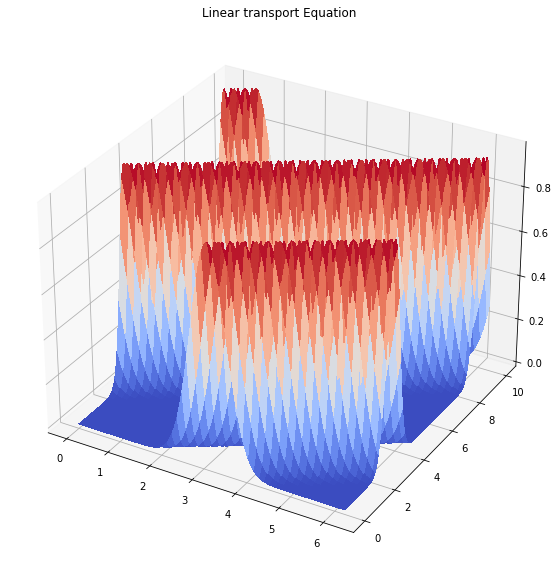

In [390]:
#transport
Omega = 2*np.pi; beta=3
N = 1;T=10; Nt=2000;Nx =100
a = 1; L = np.pi*2
dx = L/Nx
t = np.linspace(0,T, Nt)
t_span = (0, T)
y = np.zeros((len(nodes), Nt))
x = np.linspace(0,L-dx,Nx)
X, T = np.meshgrid(x,t)

u0 = np.exp(-beta*(x-L/2)**2)*np.sqrt(beta/np.pi)
result_ivp = scipy.integrate.solve_ivp(RHS_linear_transport_pseudo_spectral, t_span,u0, 'RK45',atol = 1e-7,t_eval =t)
u = result_ivp.y
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10,10))
surf = ax.plot_surface(X,T,u.T,cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_title('Linear transport Equation')
plt.show()

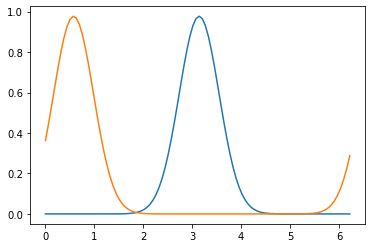

In [391]:
plt.plot(x,u[:,0])
plt.plot(x,u[:,-1])
plt.show()

## Nonlinear transport
The equation is now 
$$u_t = -a u^{\sigma -1} u_x$$


In [1326]:
sigma = 2
def RHS_nonlinear_transport_pseudo_spectral(t,y):
    N = len(y)
    n = np.arange(N);
    n[int(N/2)+1:] -= N
    dydt = -a*y**(sigma-1)*(fft.ifft(n*(2*np.pi/L)*1j*fft.fft(y)).real) #both work
    dydt = -a*(fft.ifft(n*(2*np.pi/L)*1j*fft.fft(y**(sigma))).real)/2
    return dydt

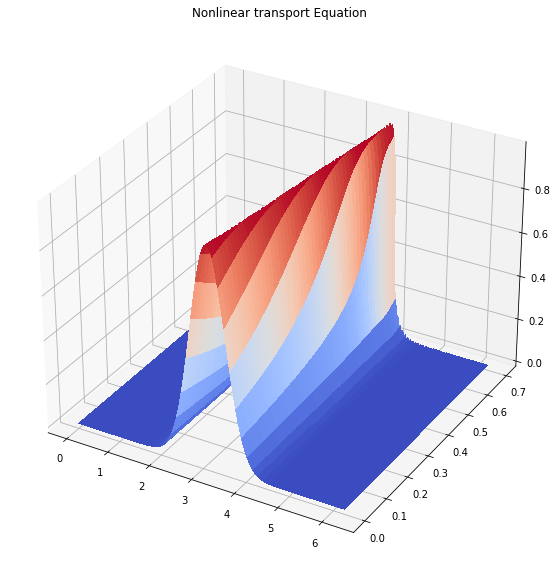

In [1335]:
#non linear transport
Omega = 2*np.pi; beta=3
N = 1;T=.7; Nt=2000;Nx =200
a = 1; L = np.pi*2
dx = L/Nx
t = np.linspace(0,T, Nt)
t_span = (0, T)
y = np.zeros((len(nodes), Nt))
x = np.linspace(0,L-dx,Nx)
X, T = np.meshgrid(x,t)

u0 = np.exp(-beta*(x-L/2)**2)*np.sqrt(beta/np.pi)
result_ivp = scipy.integrate.solve_ivp(RHS_nonlinear_transport_pseudo_spectral, t_span,u0, 'BDF',atol = 1e-7,t_eval =t)
u = result_ivp.y
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10,10))
surf = ax.plot_surface(X,T,u.T,cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_title('Nonlinear transport Equation')
plt.show()

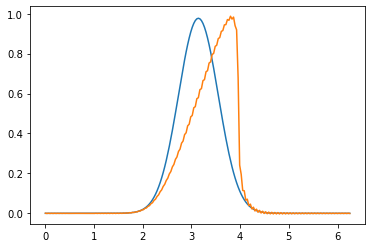

In [1336]:
plt.plot(x,u[:,0])
plt.plot(x,u[:,-1])
plt.show()

## PME Equation
The 1D PME equation is 
$$u_t = \partial_{x}^2(u^\sigma)$$

In [1337]:
## PME
sigma = 4
def RHS_PME_pseudo_spectral(t,y):
    N = len(y)
    v = y**sigma
    n = np.arange(N);
    n[int(N/2)+1:] -= N
    dydt = -fft.ifft(n**2*(2*np.pi/L)**2*fft.fft(v)).real
    return dydt

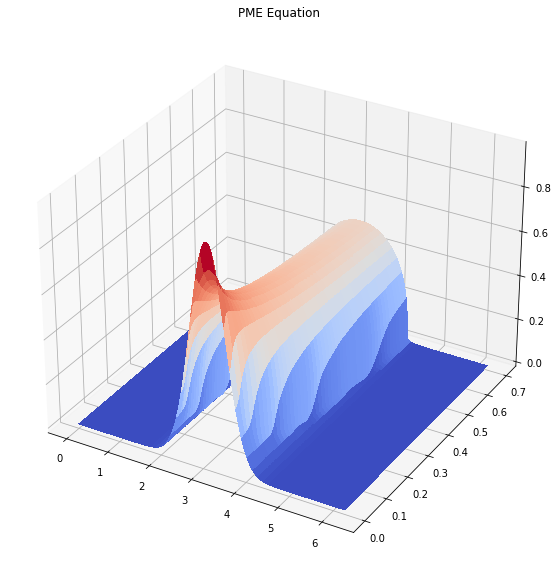

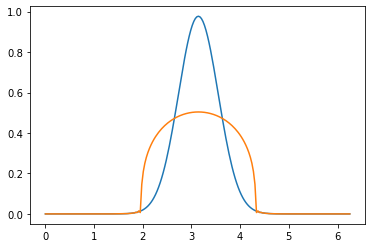

In [1338]:
#non linear transport
Omega = 2*np.pi; beta=3
N = 1;T=.7; Nt=2000;Nx =200
L = np.pi*2
dx = L/Nx
t = np.linspace(0,T, Nt)
t_span = (0, T)
y = np.zeros((len(nodes), Nt))
x = np.linspace(0,L-dx,Nx)
X, T = np.meshgrid(x,t)

u0 = np.exp(-beta*(x-L/2)**2)*np.sqrt(beta/np.pi)
result_ivp = scipy.integrate.solve_ivp(RHS_PME_pseudo_spectral, t_span,u0, 'BDF',atol = 1e-7,t_eval =t)
u = result_ivp.y
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10,10))
surf = ax.plot_surface(X,T,u.T,cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_title('PME Equation')
plt.show()
plt.plot(x,u[:,0])
plt.plot(x,u[:,-1])
plt.show()

## Our equation, PME + nonlinear transport 

The equation now looks like 
$$u_t = D(t)\partial_{xx}^2(u^\sigma)-au^{\sigma-1}\partial_x u$$

In [1339]:
## Our equation
Omega = 2*np.pi;a = 1; sigma = 4; D =0.01
def RHS_model_pseudo_spectral(t,y):
    N = len(y)
    v = y**sigma
    n = np.arange(N);
    n[int(N/2)+1:] -= N
    dydt = -fft.ifft(n**2*(2*np.pi/L)**2*fft.fft(v)).real*np.cos(Omega*t)
    dydt += -a*y**(sigma-1)*(fft.ifft(n*(2*np.pi/L)*1j*fft.fft(y)).real) 
    return dydt

500
(500, 200)


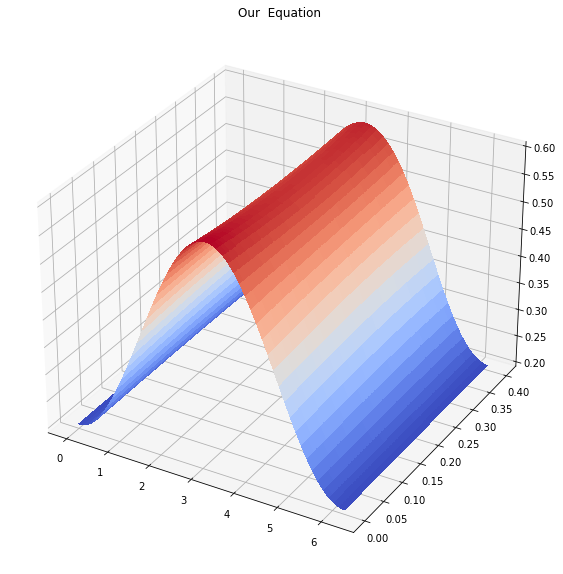

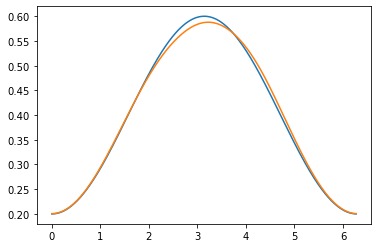

In [1340]:
beta=2
N = 1; T=.4; Nt = 200; Nx = 500
L = np.pi*2
dx = L/Nx
t = np.linspace(0,T, Nt)
t_span = (0, T)
y = np.zeros((len(nodes), Nt))
x = np.linspace(0,L-dx,Nx)
X, T = np.meshgrid(x,t)

u0 = np.exp(-beta*(x-L/2)**2)*np.sqrt(beta/np.pi)+0.3
u0 = -np.cos(x)/5+0.4
#u0 = np.exp(-beta*(x-L/4)**2)*np.sqrt(beta/np.pi)+np.exp(-beta*(x-3*L/4)**2)*np.sqrt(beta/np.pi)+0.3
print(len(u0))
result_ivp = scipy.integrate.solve_ivp(RHS_model_pseudo_spectral, t_span,u0, 'BDF',atol = 1e-7,t_eval =t)
u = result_ivp.y
print(np.shape(u))
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10,10))
surf = ax.plot_surface(X,T,u.T,cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_title('Our  Equation')
plt.show()
plt.plot(x,u[:,0])
plt.plot(x,u[:,-1])
plt.show()

In [727]:
np.shape(u)

(500, 200)

MovieWriter ffmpeg unavailable; using Pillow instead.


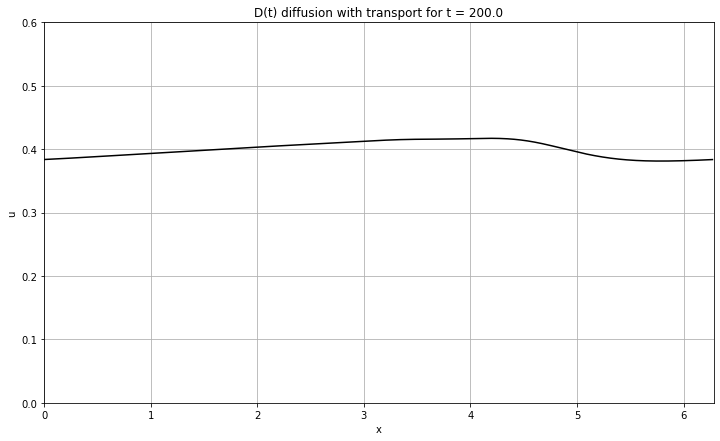

In [658]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(12,7))
def init():
    ax.plot(x, u0)
def update(i):
    ax.cla()
    time = t[i]
    #print(time)
    ax.plot(x, u[:,i],color = 'black')
    ax.set_title(f'D(t) diffusion with transport for t = {round(time,2)}')
    ax.set_ylim([0,np.max(u)])
    ax.set_xlim([0, np.pi*2])
    ax.set_xlabel('x')
    ax.set_ylabel('u')
    ax.grid()
    fig.set_facecolor('xkcd:white')
ani = FuncAnimation(fig,  update, range(0, Nt), init_func=init)
writer = PillowWriter(fps = 25)
ani.save(f'Movies/leading_order_try1_cosine.gif')

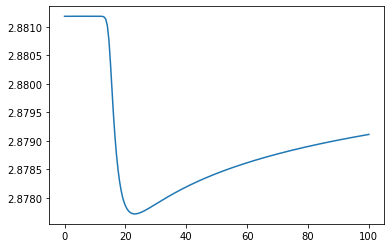

In [645]:
mass_conservation = np.trapz(u, x, axis=0)
plt.plot(t,mass_conservation)

## Fourth order corrections
We include the next order in $\epsilon$

$$u_t = D(t)\partial_{xx}^2(u^\sigma)-a u^{\sigma-2}\partial_x u-\epsilon^2 \partial_x(u^{\sigma-1}\partial_{xxx}^3 u)$$

In [1461]:
## Our equation fourth order
a = 1; sigma = 4; D = -1; epsilon = .95; Omega = 2*np.pi;
def RHS_model_4th_pseudo_spectral(t,y):
    N = len(y)
    v = y**sigma
    n = np.arange(N);
    n[int(N/2)+1:] -= N
    dydt = -fft.ifft(n**2*(2*np.pi/L)**2*fft.fft(v)).real*D/3/4
    dydt += -a*y**(sigma-2)*(fft.ifft(n*(2*np.pi/L)*1j*fft.fft(y)).real) 
    eta_zzz = fft.ifft(n**3*(2*np.pi/L*1j)**3*fft.fft(y))
    dydt += -epsilon**2*fft.ifft(y**(sigma-1)*n*(2*np.pi/L)*1j*fft.fft(eta_zzz)).real/3
    return dydt

(500, 200)


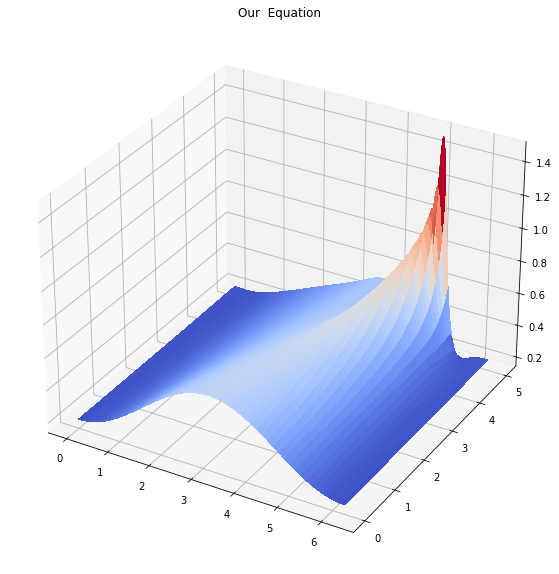

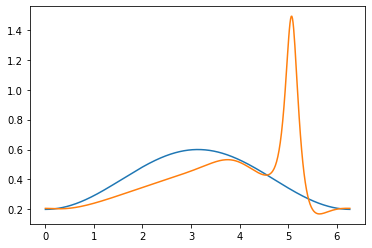

In [1470]:
beta=2
N = 1; Tf = 5.0; Nt = 200; Nx = 500
L = np.pi*2
dx = L/Nx
t = np.linspace(0,Tf, Nt)
t_span = (0, Tf)
y = np.zeros((len(nodes), Nt))
x = np.linspace(0,L-dx,Nx)
X, T = np.meshgrid(x,t)

u0 = np.exp(-beta*(x-L/2)**2)*np.sqrt(beta/np.pi)+0.3
u0 = -np.cos(x)/5+0.4
#u0 = np.exp(-beta*(x-L/4)**2)*np.sqrt(beta/np.pi)+np.exp(-beta*(x-3*L/4)**2)*np.sqrt(beta/np.pi)
result_ivp = scipy.integrate.solve_ivp(RHS_model_4th_pseudo_spectral, t_span, u0, 'BDF', atol = 1e-9, t_eval =t)
u = result_ivp.y
print(np.shape(u))
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10,10))
surf = ax.plot_surface(X,T,u.T,cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_title('Our  Equation')
plt.show()
plt.plot(x,u[:,0])
plt.plot(x,u[:,-1])
plt.show()

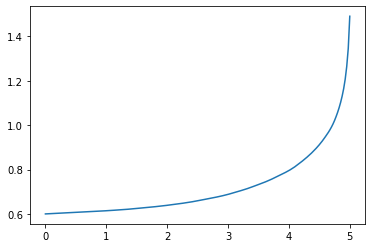

In [1475]:
plt.plot(t, np.max(u, axis=0))


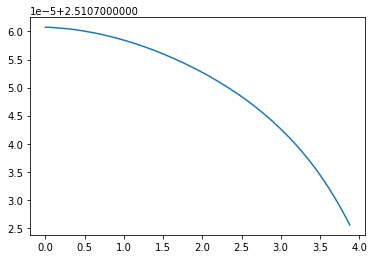

In [1463]:
mass_conservation = np.trapz(u, x, axis=0)
plt.plot(t,mass_conservation)

MovieWriter ffmpeg unavailable; using Pillow instead.


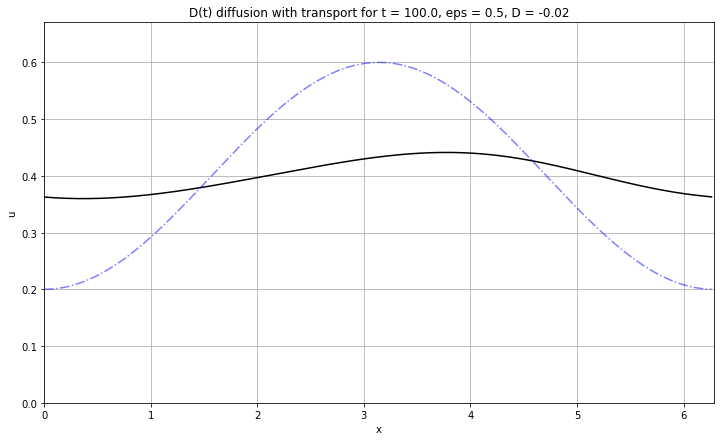

In [1362]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(12,7))
def init():
    ax.plot(x, u0)
def update(i):
    ax.cla()
    time = t[i]
    #print(time)
    ax.plot(x, u[:,i],color = 'black')
    ax.plot(x, u[:,0], '-.', alpha=.5,color ='blue')
    ax.set_title(f'D(t) diffusion with transport for t = {round(time,2)}, eps = {epsilon}, D = {D}')
    ax.set_ylim([0,np.max(u)])
    ax.set_xlim([0, np.pi*2])
    ax.set_xlabel('x')
    ax.set_ylabel('u')
    ax.grid()
    fig.set_facecolor('xkcd:white')
ani = FuncAnimation(fig,  update, range(0, Nt), init_func=init)
writer = PillowWriter(fps = 25)
ani.save(f'Movies/fourthorder/cosine_ic_T_{Tf}_D_negative.gif')

### 4th order linear equation with Time dependent D(t)
Actually I kind of keep the nonlinear transport (then not do any transport at all to just focus on what happens), only the second and fourth order term are linearized. 

The key thing here is getting and idea of what values of $D,\epsilon$ work numerically

Equation is
$$u_t = D(t) u_{xx} -\epsilon^2 u_{xxxx}$$

In [1501]:
a = .5; sigma = 2; D = -.75; epsilon = .539; Omega = 2*np.pi*0;
def RHS_model_linear_4th_pseudo_spectral(t,y):
    N = len(y)
    n = np.arange(N);
    n[int(N/2)+1:] -= N
    dydt = -fft.ifft(n**2*(2*np.pi/L)**2*fft.fft(y)).real*np.cos(Omega*t)*D/3
    dydt += -a*y**(sigma-1)*(fft.ifft(n*(2*np.pi/L)*1j*fft.fft(y)).real) 
    dydt += -epsilon**2*fft.ifft(n**4*(2*np.pi/L*1j)**4*fft.fft(y)).real/3
    return dydt

(700, 300)


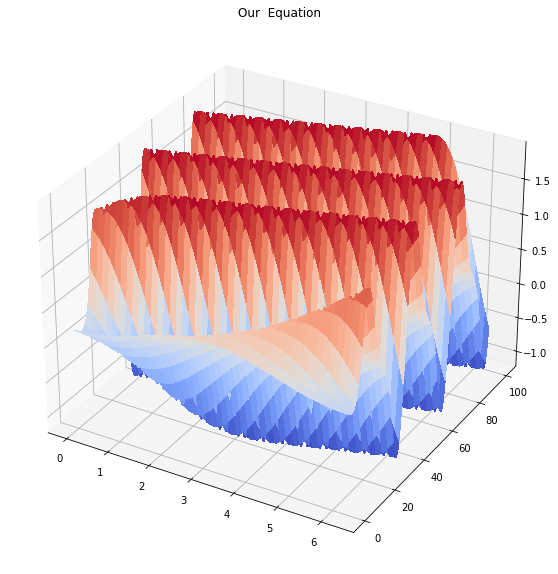

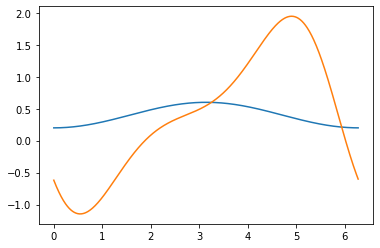

/var/folders/wx/hvlspwk90qj6x4ybxggkjycr0000gn/T/ipykernel_45308/3220902712.py:28: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(t,np.exp(-4**2*(np.sin(Omega*t)*D/Omega)))


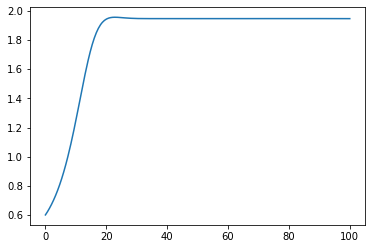

In [1506]:
beta = 3
N = 1; Tf = 100; Nt = 300; Nx = 700
L = np.pi*2
dx = L/Nx
t = np.linspace(0,Tf, Nt)
t_span = (0, Tf)
y = np.zeros((len(nodes), Nt))
x = np.linspace(0,L-dx,Nx)
X, T = np.meshgrid(x,t)

u0 = np.exp(-beta*(x-L/2)**2)*np.sqrt(beta/np.pi)+0.3
u0 = -np.cos(1*x)/5+0.4
#u0 = np.exp(-beta*(x-L/4)**2)*np.sqrt(beta/np.pi)+np.exp(-beta*(x-3*L/4)**2)*np.sqrt(beta/np.pi)
result_ivp = scipy.integrate.solve_ivp(RHS_model_linear_4th_pseudo_spectral, t_span, u0, 'BDF', 
                                       atol = 1e-7, t_eval =t)
u = result_ivp.y
print(np.shape(u))
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10,10))
surf = ax.plot_surface(X,T,u.T,cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_title('Our  Equation')
plt.show()
plt.plot(x,u[:,0])
plt.plot(x,u[:,-1])
plt.show()
plt.plot(t, np.max(u, axis=0))
#plt.plot(t, np.sqrt(beta/np.pi)*1/np.sqrt(4*D*beta/Omega*np.sin(Omega*t)+1)+0.3)
plt.plot(t,np.exp(-4**2*(np.sin(Omega*t)*D/Omega)))
plt.show()


MovieWriter ffmpeg unavailable; using Pillow instead.


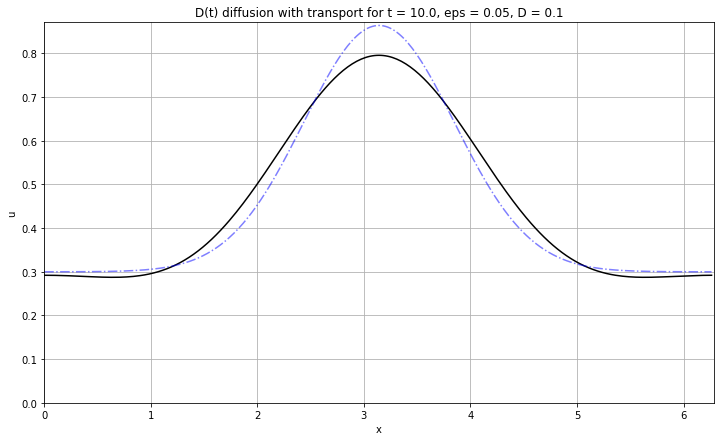

In [1129]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(12,7))
def init():
    ax.plot(x, u0)
def update(i):
    ax.cla()
    time = t[i]
    #print(time)
    ax.plot(x, u[:,i],color = 'black')
    ax.plot(x, u[:,0], '-.', alpha=.5,color ='blue')
    ax.set_title(f'D(t) diffusion with transport for t = {round(time,2)}, eps = {epsilon}, D = {D}')
    ax.set_ylim([0,np.max(u)])
    ax.set_xlim([0, np.pi*2])
    ax.set_xlabel('x')
    ax.set_ylabel('u')
    ax.grid()
    fig.set_facecolor('xkcd:white')
ani = FuncAnimation(fig,  update, range(0, Nt), init_func=init)
writer = PillowWriter(fps = 25)
ani.save(f'Movies/fourthorder/gaussian_cosine_ic_T_{Tf}_linear_no_transport_.gif')

## Nonlinearities
$$\partial_t u = D(t)\partial_{xx}^2 u -\epsilon u^3$$

I should try this problem:
$$\partial_t u = D(t)\partial_{xx}^2 u -u -\epsilon u^3$$

In [1514]:
a = .5; sigma = 1; D = 1.; epsilon = .0; Omega = 3*np.pi;
def RHS_diffusion_cubic_nl(t,y):
    N = len(y)
    n = np.arange(N);
    n[int(N/2)+1:] -= N
    dydt = -fft.ifft(n**2*(2*np.pi/L)**2*fft.fft(y)).real*(1+np.random.normal()*D)
    dydt += -a*y**(sigma-1)*(fft.ifft(n*(2*np.pi/L)*1j*fft.fft(y)).real) 
    #dydt += -epsilon*y**3
    return dydt

In [1510]:
beta = 1
N = 1; Tf = 2.53; Nt = 300; Nx = 300
L = np.pi*2
dx = L/Nx
t = np.linspace(0,Tf, Nt)
t_span = (0, Tf)
y = np.zeros((len(nodes), Nt))
x = np.linspace(0,L-dx,Nx)
X, T = np.meshgrid(x,t)

u0 = np.exp(-beta*(x-L/2)**2)*np.sqrt(beta/np.pi)
#u0 = -np.cos(2*x)/5+0.4
#u0 = np.exp(-beta*(x-L/4)**2)*np.sqrt(beta/np.pi)+np.exp(-beta*(x-3*L/4)**2)*np.sqrt(beta/np.pi)
result_ivp = scipy.integrate.solve_ivp(RHS_diffusion_cubic_nl, t_span, u0, 'BDF', 
                                       atol = 1e-7, t_eval =t)
u = result_ivp.y
print(np.shape(u))
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10,10))
surf = ax.plot_surface(X,T,u.T,cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_title(f'Time dependent diffusion with cubic nonlinearity of strength eps = {epsilon}')
plt.show()
plt.plot(x,u[:,0])
plt.plot(x,u[:,-1])
plt.show()
fig, ax = plt.subplots(nrows = 1, ncols =2, figsize=(10,3))
ax[0].plot(t, np.max(u, axis=0)); ax[1].plot(t,np.cos(Omega*t)); ax[1].grid()
#plt.plot(t, np.sqrt(beta/np.pi)*1/np.sqrt(4*D*beta/Omega*np.sin(Omega*t)+1)+0.3)
#ax[0].plot(t,np.exp(-4**2*(np.sin(Omega*t)*D/Omega)))
plt.show()

KeyboardInterrupt: 